### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


### Carga de datos

In [2]:
# Datos en bruto
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Descripción de los datos

* gender: Sexo del individuo, puede tener un impacto a ser más suceptible a la diabetes.

* age: La edad del individuo es un factor importante, ya que es más común un diagnostico en adultos mayores. El rango de edad en   el dataset va de 0-80 años.

* hypertension: La hipertensión es una condición médica en donde la presión arterial es persistentemente elevada. Tiene valores   de 0 o 1, donde 0 indica que no hay hipertensión y 1 que si hay hipertension.

* heart_disease: La cardiopatía es otra condición médica que está asociada a un incremento en el riesgo de desarrollar diabetes.
  Tiene valores de 0 o 1, donde 0 indica que no hay cardiopatía y 1 que si hay cardiopatía.
  
* smoking_history: El historial de fumador también es considerado un factor de riesgo para la diabetes, y además puede aumentar   las complicaciones asociadas. En el dataset hay 5 valores, not current, former, no info, current, never and ever.

* bmi: El indice de masa corporal es una medida de la grasa corporal basada en el peso y la estatura. Altos porcentaje de BMI     está relacionado a con mayor riesgo de diabetes. En el dataset los rangos de BMI van de 10.16 a 71.55, donde un BMI menor de     18.5 es bajopeso, 18.5-24.9 es normal, 25-29.9 es sobrepeso, y 30 o más es obesidad.

* HbA1c_level: La hemoglobina A1c es una medida que ve el porcentaje de azúcar en la sangre en los últimos 2-3 meses. Altos       niveles están asociados al riesgo de diabetes. Generalmente un nivel de más de un 6.5% indica diabetes.

* blood_glucose_level: Los niveles de glucosa indican la cantidad de glucosa en el torrente sanguíneo en el momento de la         prueba. Altos niveles están asociados al riesgo de diabetes.

* diabetes: Diabetes es el target para la predicción. El valor 1 indica la presencia de diabetes y el valor 0 la ausencia de       diabetes.

In [3]:
# Información del dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Cantidad de datos contenidos en el dataset. Resultado: 9 columnas y 100.000 registros
df_diabetes.shape

(100000, 9)

In [5]:
# Verificación de valores nulos. Resultado: no hay valores nulos
df_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Limpieza de datos

In [6]:
# Verificar los valores unicos
for column in df_diabetes.columns:
    print("{:20} {} unique values".format(column, len(df_diabetes[column].unique())))

gender               3 unique values
age                  102 unique values
hypertension         2 unique values
heart_disease        2 unique values
smoking_history      6 unique values
bmi                  4247 unique values
HbA1c_level          18 unique values
blood_glucose_level  18 unique values
diabetes             2 unique values


######  Columna 'gender'

In [7]:
# Verificamos la columna 'gender' ya que muestra 3 valores.
df_diabetes['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
# Eliminamos el valor de 'Other', ya que es información demasiado amplia y puede interferir negativamente en la predicción del modelo.
df_diabetes = df_diabetes[df_diabetes['gender'] != 'Other']

### Análisis exploratorio

Text(0.5, 0, 'Hemoglobina A1ac')

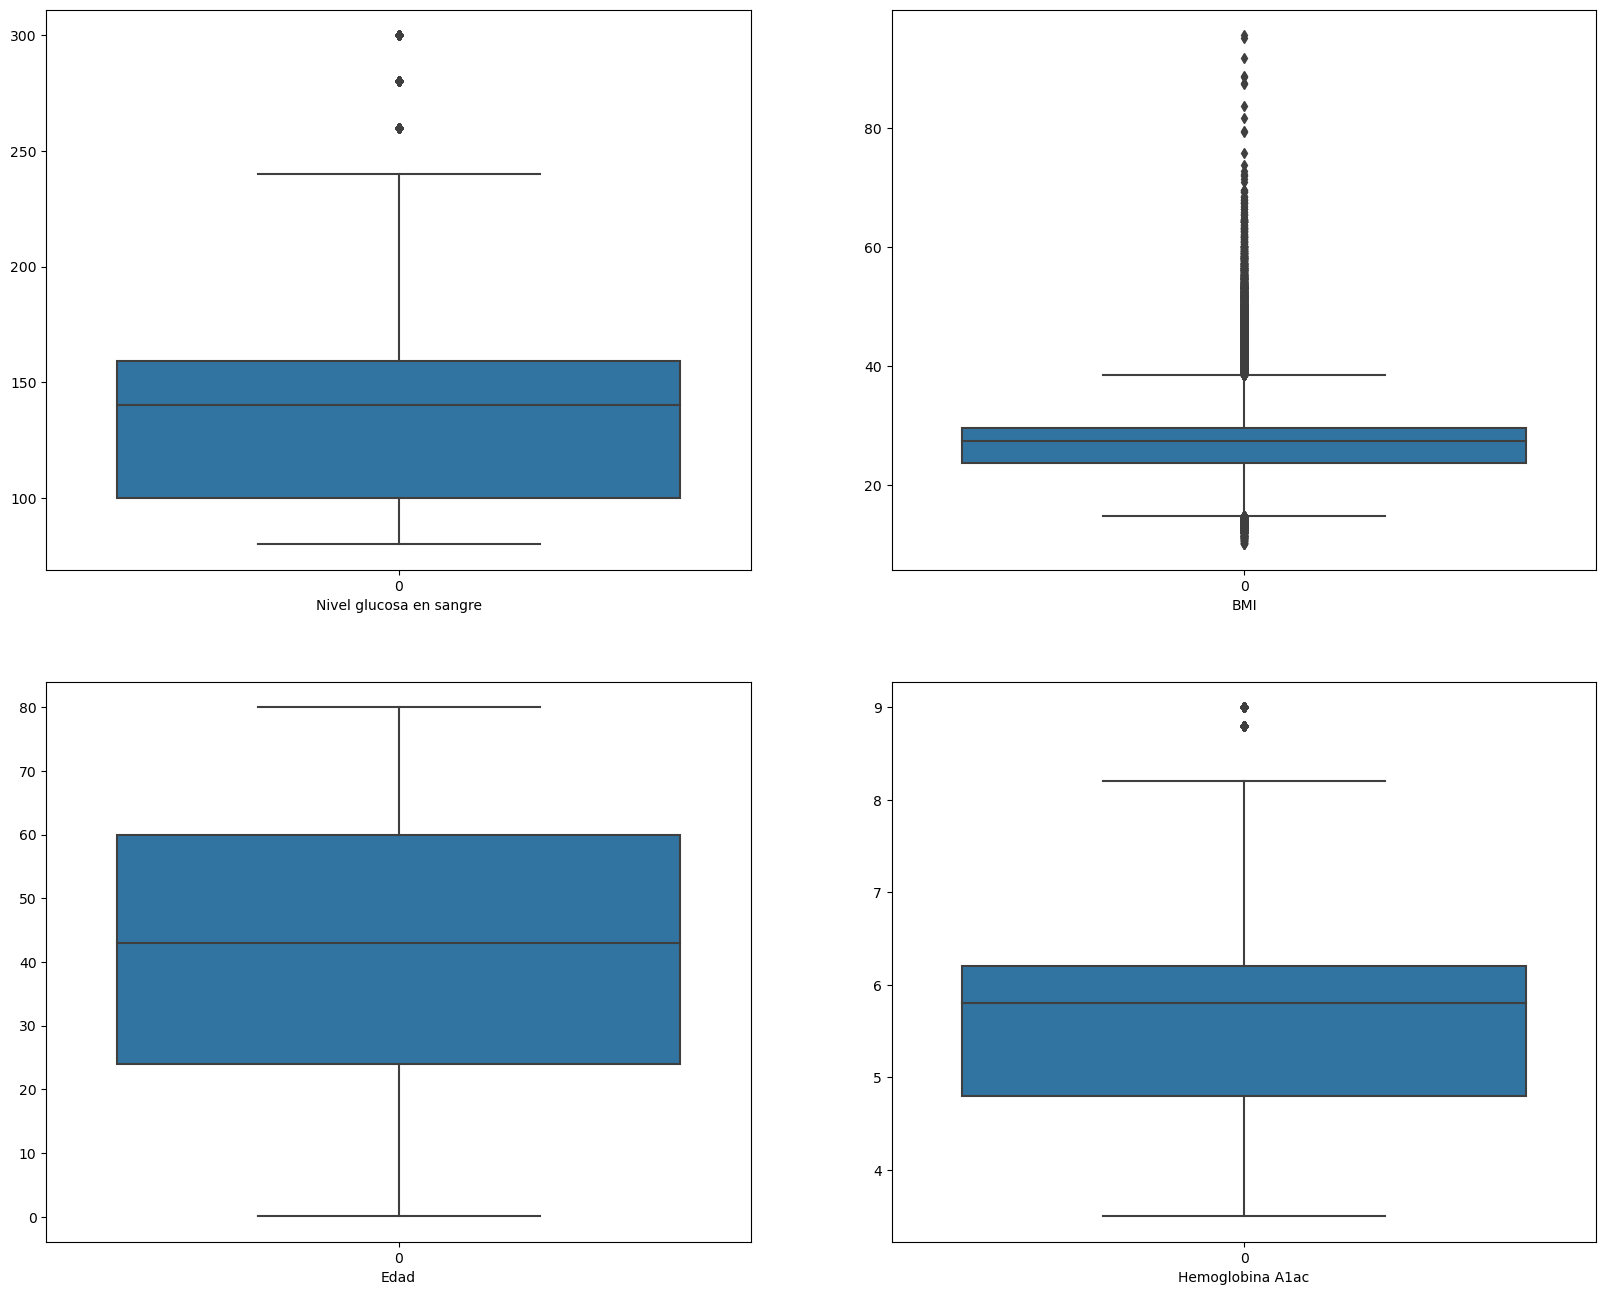

In [9]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.boxplot(df_diabetes["blood_glucose_level"])
plt.xlabel("Nivel glucosa en sangre")

plt.subplot(2,2,2)
sns.boxplot(df_diabetes["bmi"])
plt.xlabel("BMI")

plt.subplot(2,2,3)
sns.boxplot(df_diabetes["age"])
plt.xlabel("Edad")

plt.subplot(2,2,4)
sns.boxplot(df_diabetes["HbA1c_level"])
plt.xlabel("Hemoglobina A1ac")

In [10]:
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
df_diabetes["smoking_history"].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [12]:
# Eliminamos la columna "smoking_history" ya que un 35% de los registros no presentan información
df_diabetes.drop("smoking_history", axis=1, inplace=True)

## Dummys

Vamos a utiliazar la función get_dummies de pandas para pasar nuestra columna "gender" a datos categóricos. Así en una de las columnas nos representa el genero femenino con un valor de 1 y lo mismo en la columna del genero masculino.

In [13]:
# Gender
Gender_dummies = pd.get_dummies(df_diabetes["gender"], prefix="gender")
df_diabetes.drop("gender", axis=1, inplace=True)
df_diabetes = df_diabetes.join(Gender_dummies)

In [14]:
df_diabetes.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male
0,80.0,0,1,25.19,6.6,140,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1
3,36.0,0,0,23.45,5.0,155,0,1,0
4,76.0,1,1,20.14,4.8,155,0,0,1


In [15]:
# Eliminamos la columna "gender_male" ya que la columna "gender_Female" no proporciona los datos suficientes.
df_diabetes.drop("gender_Male", axis=1, inplace=True)

In [16]:
df_diabetes.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female
0,80.0,0,1,25.19,6.6,140,0,1
1,54.0,0,0,27.32,6.6,80,0,1
2,28.0,0,0,27.32,5.7,158,0,0
3,36.0,0,0,23.45,5.0,155,0,1
4,76.0,1,1,20.14,4.8,155,0,0


In [17]:
df_diabetes["diabetes"].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

Como podemos observar nuestro dataset está compuesto en más de un 90% por personas que no tienen diabetes y esto influye a la hora de predecir futuras apariciones de esta enfermedad en los pacientes, como veremos en las metrícas, al final.

## Seleccion de los datos

In [18]:
x = df_diabetes.drop("diabetes", axis=1)
y = df_diabetes["diabetes"]

## MinMaxScaler

En este caso, como no tenemos valores atípicos vamos a escalar nuestros datos en un rango de 0 hasta 1, utilizando el MinMaxScaler.

In [19]:
mmx = MinMaxScaler()
x_sc = mmx.fit_transform(x)

## PCA

# Reducción de dimensionalidad

In [20]:
pca = PCA()
x_pca = pca.fit_transform(x_sc)

pca.explained_variance_ratio_

array([0.4791435 , 0.1961746 , 0.10920285, 0.08001963, 0.06656695,
       0.05861575, 0.01027672])

In [21]:
pca = PCA(3)
x_sc = pca.fit_transform(x_sc)

Vamos a utilizar un PCA, con los 4 componentes que más influyen a la hora de predecir pacientes con diabetes por que al aplicar nuestro modelo de arbol de decisiones es lo que mejor precisión nos da con el menor numero de componentes.
Si por ejemplo utilizamos 3 componentes, el modelo no es capaz de predecir los True Positive, en cambio si aumentamos a 5 ò más nuestro modelo no muestra mejora.

# Creación del modelo (Arbol de decisión)

## Validación cruzada

In [22]:
# Creación del modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=1)

scores = cross_val_score(clf, x_sc, y, cv=10)
avg_score = np.mean(scores)
print(scores)
print('Precisión media:',avg_score)

[0.91689169 0.91609161 0.91688338 0.91678336 0.91728346 0.91788358
 0.9159832  0.91588318 0.91528306 0.9169834 ]
Precisión media: 0.9165949891648497


Tras utiliar la validación cruzada, vemos que nuestro modelo predictivo obtiene una precisión media del 95%, lo cual está muy bien.

# Creación e implementación de nuestro modelo predictivo

### Division de datos

In [23]:
# Conjunto de entrenamiento de entrenamiento (entrenamiento + validación), conjunto de testeo
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.05, random_state=1)

# Conjunto de entrenamiento, conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=1)

In [24]:
x_train.shape

(90232, 3)

In [25]:
x_test.shape

(5000, 3)

In [26]:
x_val.shape

(4750, 3)

In [27]:
# Creamos nuestro modelo
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

En este caso utilizamos una profunidad máxima igual a 2 en nuestro arbol de decisiones por que es la que mejor precisión nos da al momento de querer predecir que personas si que van a contraer la enfermedad. Si utilizamos cualquier otra profunidad, la precisión de los verdaderos positivos diminuye bastante, hasta a un 80% he podido comprobar, y esto podría ser perjudicial para nuestros pacientes. Como indique arriba esto se debe a que nuestro dataset contiene muchos más registros de personas que no tienen diabetes.

In [28]:
# Validacion de resultados
y_pred = clf.predict(x_val)

In [29]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4339
           1       0.00      0.00      0.00       411

    accuracy                           0.91      4750
   macro avg       0.46      0.50      0.48      4750
weighted avg       0.83      0.91      0.87      4750



In [30]:
# Prediccion de futuros resultados
y_pred = clf.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      4574
           1       0.00      0.00      0.00       426

    accuracy                           0.91      5000
   macro avg       0.46      0.50      0.48      5000
weighted avg       0.84      0.91      0.87      5000



Como podemos observar, nuestro modelo presenta una precisión total del 95%. Si lo desglosamos, es capaz de predecir con un 98% de aciertos a las personas que si van a tener diabetes, aunque este porcentaje baja hasta el 95% a la hora de predecir las personas no van a tener diabetes. Esto se ve reflejado en nuestro recall, que está solo en un 44% y esto nos indica que nuestro modelo donde más falla es a la hora de decidir las personas que no van a tener diabetes pero que al final si que acaban teniendo esta enfermedad.